Question 1: Understanding Overfitting with Polynomial Regression<br>
Task: Compare linear vs polynomial regression to observe overfitting.

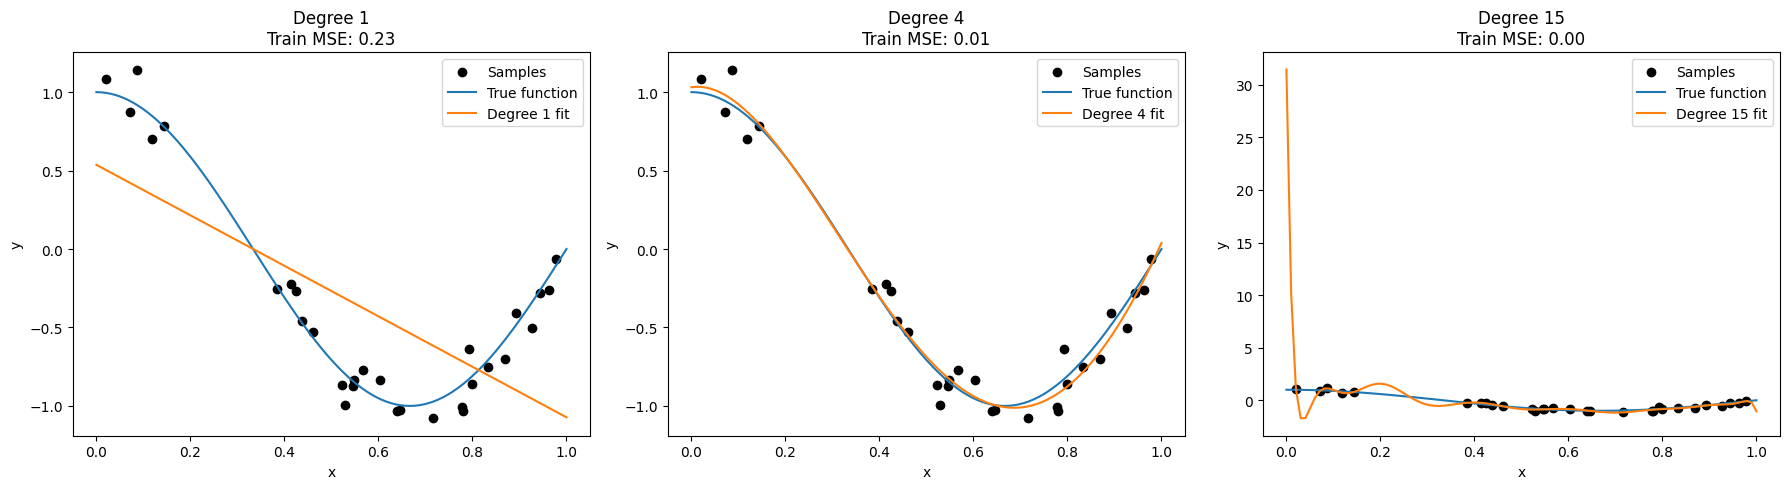

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Create synthetic data
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

# Prepare test data for plotting
X_plot = np.linspace(0, 1, 100)

# Degrees to compare
degrees = [1, 4, 15]

plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees):
    # Transform features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = polynomial_features.fit_transform(X.reshape(-1, 1))
    X_plot_poly = polynomial_features.transform(X_plot.reshape(-1, 1))
    
    # Fit model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    y_plot = model.predict(X_plot_poly)
    
    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    
    # Plot
    plt.subplot(1, len(degrees), i+1)
    plt.scatter(X, y, color='black', label='Samples')
    plt.plot(X_plot, np.cos(1.5 * np.pi * X_plot), label='True function')
    plt.plot(X_plot, y_plot, label=f'Degree {degree} fit')
    plt.title(f'Degree {degree}\nTrain MSE: {mse:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()
